# NY Teacher Evaluation Data

## Package Requirements

In [1]:
import pandas as pd
import numpy as np
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import random
from itertools import chain
import seaborn as sns
# import tabulate

%matplotlib inline

# launch a qtconsole if first time through
try:
    qtc
except NameError:
    %qtconsole
finally:
    qtc = True

## Domain Notes

This article talks about how teachers are scored

from: http://www.syracuse.com/news/index.ssf/2013/10/how_the_state_teacher_evaluation_works_and_why_syracuse_teachers_struggled.html#incart_river

Article text:

The law establishing the teacher evaluation system in New York mandates that each teacher gets a rating between 1 and 100. Here's how the system works, and where Syracuse's teachers fell short.
<font color='blue'>
* Twenty percent of the evaluation for teachers in grades K-8 is based on how students do on the state's math and English language arts tests, compared to similar students across the state. Teachers whose students don't take state tests are rated on the students' improvement on other tests, some of which were developed by the district.

High school teachers are rated on their students' performance on Regents exams, or other tests if they do not teach a Regents course.

* Another 20 percent of the evaluation is drawn from locally developed measures based on local or state testing.

* The final 60 percent is based on classroom observations and other factors, including feedback from students and parents and a review of the teachers' lesson plans, student portfolios or other material.
</font>  
In Syracuse, teachers excelled on the portion of the evaluation involving classroom observations. Some 97 percent landed in the effective or very effective range on that measure.
Forty percent of Syracuse teachers need improvement plans, early evaluation results show

Jeremy Grant-Skinner, the district's director of talent management, said that's similar to how teachers in many districts fared on their full evaluations before the new system was implemented. In fact, the reality that the vast majority of teachers were typically deemed effective in traditional evaluation systems was a major reason why state and federal officials pushed to create the new ratings.

Syracuse's teachers did not fare as well on the 20 points based on state test scores. Syracuse students in general did not do well on the tests. But because their performance was judged in relation to that of similar students across the state -- in terms of poverty, disability status and other measures -- the teachers did not fare as poorly as they could have.

Just over 20 percent of teachers earned a highly effective rating on the measure, and about 40 percent were rated effective. But almost 20 percent got a developing rating and about 18 percent were rated ineffective.

Teachers did worst on the locally developed testing measure, with some 80 percent in the developing or ineffective categories.

In Syracuse, the district and the union, working together, based the local measures for K-8 teachers on schoolwide improvement on the state's math and English language arts tests.

The goal was to reduce the number of students scoring at the lowest level on the tests by 10 percentage points, and increase those in the highest two levels by five percentage points. Since most students did poorly on the revamped exams given in April, the teachers' scores suffered.

In any given school, every teacher was given the same measure, whether they taught students who took the state tests or not. Even physical education, music and art teachers were rated on that measure.
State teachers leader calls Syracuse the "poster child" for rushed evaluation system

At the high school level, the goal was to increase the number of students reaching proficiency on five core Regents exams by 3 percent each.

The difference in the measures between K-8 and high school teachers may have led to the slightly better scores for high school teachers than for teachers in elementary and middle schools. It also might explain, at least in part, why all the teachers rated highly effective overall are at the high school level.

### SRC2014.mdb

#### Table: Accountability

In [2]:
accountability = pd.io.parsers.read_csv("../data/table_export/Accountability.csv")

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (6,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
accountability.shape

(1378118, 15)

Certainly the largest of the tables in this file. 

In [4]:
display.display(accountability.columns.values.tolist())

['ENTITY_CD',
 'ENTITY_NAME',
 'ACC_YEAR',
 'ACCOUNTABILITYMEASURE',
 'ACC_NAME',
 'NUM_ENROLL',
 'NUM_PARTIC',
 'PER_PARTIC',
 'NUM_PERF',
 'PI_G_RATE',
 'AMO_STAND',
 'CURRENT_SH_TARGET',
 'MET_PART',
 'MET_PERF',
 'AYP']

In [5]:
print accountability.ACC_NAME.unique()
print accountability.ACCOUNTABILITYMEASURE.unique()

['Hispanic or Latino' 'Male' 'Multiracial'
 'Not American Indian or Alaska Native' 'Not Asian or Pacific Islander'
 'Not Black or African American' 'Not Economically Disadvantaged'
 'Not Hispanic or Latino' 'Not Migrant' 'Not Multiracial' 'Not White'
 'Students with Disabilities' 'White' 'American Indian or Alaska Native'
 'Asian or Native Hawaiian/Other Pacific Islander' 'All Students'
 'Asian or Pacific Islander' 'Black or African American'
 'Economically Disadvantaged' 'English Proficient' 'Female'
 'General Education' 'Limited English Proficient' 'Migrant']
['High School Math' 'Elementary/Middle-Level ELA' '4-Year Graduation Rate'
 '5-Year Graduation Rate' 'Elementary/Middle-Level MATH'
 'Elementary/Middle-Level Science' 'High School ELA']


In [6]:
print accountability.iloc[range(10), :]

      ENTITY_CD                     ENTITY_NAME  ACC_YEAR  \
0  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
1  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
2  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
3  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
4  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
5  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
6  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
7  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
8  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   
9  331300011430  BROOKLYN TECHNICAL HIGH SCHOOL      2012   

  ACCOUNTABILITYMEASURE                              ACC_NAME NUM_ENROLL  \
0      High School Math                    Hispanic or Latino         85   
1      High School Math                                  Male        720   
2      High School Math                           Multiracial          2   
3      High School Math 

#### Table: Regents_Common_Core_Examination_Annual_Results

In [7]:
regents_ccexam = pd.io.parsers.read_csv('../data/table_export/Regents_Common_Core_Examination_Annual_Results.csv')

In [8]:
print regents_ccexam.head()

   ENTITY_CD         ENTITY_NAME  YEAR      SUBJECT  \
0          1  NYC Public Schools  2014   REG_COMENG   
1          1  NYC Public Schools  2014  REG_COMALG1   
2          1  NYC Public Schools  2014  REG_COMALG1   
3          1  NYC Public Schools  2014   REG_COMENG   
4          1  NYC Public Schools  2014  REG_COMALG1   

                                     SUBGROUP_NAME  TESTED NUM_LEVEL1  \
0                                     All Students   14211       2735   
1                                     All Students   54987      11445   
2                 American Indian or Alaska Native     365         79   
3                 American Indian or Alaska Native      85         13   
4  Asian or Native Hawaiian/Other Pacific Islander   10407        600   

  PER_LEVEL1 NUM_LEVEL2 PER_LEVEL2 NUM_LEVEL3 PER_LEVEL3 NUM_LEVEL4  \
0         19       1939         14       4663         33       3023   
1         21      11963         22      21562         39       8209   
2         22     

## Exploratory Work

Our goal is to see if these data are appropriate for use in teaching several concepts of data analysis. The current targeted concepts are:

* linear regression  
* naive bayes  
* decision trees  

Here we will look for appropriate data to use to support these concepts.

### Potential Questions

* Does teacher qualification affect test scores?
* Does teacher qualification affect teacher rating?
* Does teacher rating correlate to test scores?
* Does class size impact test scores?

### Linear Regression

The dataset contains several sets of numeric data. Something basic would be to see the relationship between class size and test results. We will start by focusing on a more specific group and see later if it is appropriate to expand this group.

Question: Is the average class size per school a good predictor of performance on regents tests?

Let's take a closer look at Science8_Subgroup_Results

In [9]:
science8 = pd.io.parsers.read_csv('../data/table_export/Science8_Subgroup_Results.csv')

print science8.shape
print science8.columns

(88818, 15)
Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'SUBGROUP_NAME', u'NUM_TESTED', u'LEVEL1_COUNT', u'LEVEL1_%TESTED', u'LEVEL2_COUNT', u'LEVEL2_%TESTED', u'LEVEL3_COUNT', u'LEVEL3_%TESTED', u'LEVEL4_COUNT', u'LEVEL4_%TESTED', u'TOTAL_SCALE_SCORES', u'MEAN_SCORE'], dtype='object')


In [10]:
print science8.head()

      ENTITY_CD                                       ENTITY_NAME  YEAR  \
0  331700010334  MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE  2013   
1  331700010334  MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE  2013   
2  331700010334  MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE  2013   
3  331700010334  MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE  2013   
4  331700010334  MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE  2013   

                      SUBGROUP_NAME  NUM_TESTED LEVEL1_COUNT LEVEL1_%TESTED  \
0         Black or African American          42           22             52   
1  Black or African American Female          19            8             42   
2    Black or African American Male          23           14             61   
3        Economically Disadvantaged          49           24             49   
4                English Proficient          51            s              s   

  LEVEL2_COUNT LEVEL2_%TESTED LEVEL3_COUNT LEVEL3_%TESTED LEVEL4_COUNT  \


Now let's pull in the table on average class size:

In [11]:
avg_class_size = pd.io.parsers.read_csv('../data/table_export/Average_Class_Size.csv')

In [12]:
print avg_class_size.shape
print avg_class_size.columns

(14897, 12)
Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'COMMON_BRANCH', u'GRADE_8_MATH', u'GRADE_8_ENGLISH', u'GRADE_8_SCI', u'GRADE_8_SS', u'GRADE_10_ENGLISH', u'GRADE_10_MATH', u'GRADE_10_SCI', u'GRADE_10_SS'], dtype='object')


In [13]:
print avg_class_size.head()

   ENTITY_CD         ENTITY_NAME  YEAR  COMMON_BRANCH  GRADE_8_MATH  \
0    4000000  CATTARAUGUS County  2013             19            17   
1    5000000       CAYUGA County  2013             20            17   
2    6000000   CHAUTAUQUA County  2013             19            18   
3    7000000      CHEMUNG County  2013             22            21   
4    8000000     CHENANGO County  2013             18            18   

   GRADE_8_ENGLISH  GRADE_8_SCI  GRADE_8_SS  GRADE_10_ENGLISH  GRADE_10_MATH  \
0               17           19          18                18             16   
1               19           18          20                21             18   
2               18           19          18                17             16   
3               21           23          21                23             18   
4               18           19          17                17             17   

   GRADE_10_SCI  GRADE_10_SS  
0            18           18  
1            19           21  

Let's merge these two tables

In [14]:
perf_by_class_size = pd.merge(science8, avg_class_size, on='ENTITY_CD', how='left')

In [15]:
print perf_by_class_size.shape
print perf_by_class_size.columns

(259608, 26)
Index([u'ENTITY_CD', u'ENTITY_NAME_x', u'YEAR_x', u'SUBGROUP_NAME', u'NUM_TESTED', u'LEVEL1_COUNT', u'LEVEL1_%TESTED', u'LEVEL2_COUNT', u'LEVEL2_%TESTED', u'LEVEL3_COUNT', u'LEVEL3_%TESTED', u'LEVEL4_COUNT', u'LEVEL4_%TESTED', u'TOTAL_SCALE_SCORES', u'MEAN_SCORE', u'ENTITY_NAME_y', u'YEAR_y', u'COMMON_BRANCH', u'GRADE_8_MATH', u'GRADE_8_ENGLISH', u'GRADE_8_SCI', u'GRADE_8_SS', u'GRADE_10_ENGLISH', u'GRADE_10_MATH', u'GRADE_10_SCI', u'GRADE_10_SS'], dtype='object')


   GRADE_8_SCI  MEAN_SCORE
0           32          43
1           26          43
3           32          45
4           26          45
6           32          41


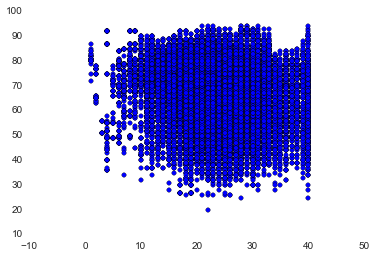

In [16]:
df = perf_by_class_size.loc[:, ['GRADE_8_SCI', 'MEAN_SCORE']]
df.loc[df.MEAN_SCORE == 's', ['MEAN_SCORE']] = np.nan
df = df.dropna(axis=0)
df.MEAN_SCORE = df.MEAN_SCORE.astype('float')
print df.head()

fig, ax = plt.subplots()

ax.scatter(df.GRADE_8_SCI, df.MEAN_SCORE)

That doesn't look so good. I'll have to keep looking.  

What is TOTAL_SCALE_SCORES?

(152974, 2)
   GRADE_8_SCI  TOTAL_SCALE_SCORES
0           32                1812
1           26                1812
3           32                 864
4           26                 864
6           32                 948


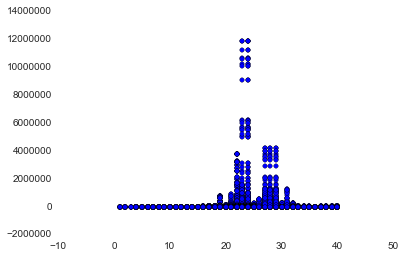

In [17]:
df = perf_by_class_size.loc[:, ['GRADE_8_SCI', 'TOTAL_SCALE_SCORES']]
df.loc[df.TOTAL_SCALE_SCORES == 's', ['TOTAL_SCALE_SCORES']] = np.nan
df = df.dropna(axis=0)
df.TOTAL_SCALE_SCORES = df.TOTAL_SCALE_SCORES.astype('float')
print df.shape
print df.head()

fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(fmt)
ax.scatter(df.GRADE_8_SCI, df.TOTAL_SCALE_SCORES)
# plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

That's interesting. I need to figure out what I'm looking at.

### Is there a correlation between teacher rating and student performance?

How do we look for this?

According to the article, 20% of their rating is based on student performance on standardized tests. Let's just look to see if we see that reflected in the data.

First we need to get teacher ratings. That appears to be in the table APPR_DISTRICT_RESEARCHER_FILE_DATA:

In [18]:
pth = '../data/table_export/APPR_SCHOOL_RESEARCHER_FILE_DATA.csv'
school_researchers = pd.io.parsers.read_csv(pth)

print school_researchers.shape
print school_researchers.columns


(187134, 10)
Index([u'DISTRICT_BEDS', u'DISTRICT_NAME', u'SCHOOL_BEDS', u'SCHOOL_NAME', u'EDUCATOR_ID', u'GROWTH_RATING', u'LOCAL_RATING', u'OTHER_RATING', u'OVERALL_RATING', u'OVERALL_SCORE'], dtype='object')


In [19]:
school_researchers.head()
# you will need to make the window pretty wide to see the columns

,DISTRICT_BEDS,DISTRICT_NAME,SCHOOL_BEDS,SCHOOL_NAME,EDUCATOR_ID,GROWTH_RATING,LOCAL_RATING,OTHER_RATING,OVERALL_RATING,OVERALL_SCORE
0,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5129448,Effective,Suppressed,Highly Effective,Effective,86
1,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5131556,Suppressed,Suppressed,Highly Effective,Effective,79
2,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5134986,Effective,Suppressed,Effective,Effective,83
3,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5141334,Highly Effective,Suppressed,Effective,Effective,90
4,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5143449,Effective,Suppressed,Effective,Effective,81


Okay, now can we find data on how students of these teachers (identified by EDUCATOR_ID) did in testing.

I don't see educator_id in any other tables, so it looks like we can't investigate the impact of individual teachers.

Let's take another look at test scores:

In [20]:
print science8.columns
science8.iloc[range(10), range(5)]

Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'SUBGROUP_NAME', u'NUM_TESTED', u'LEVEL1_COUNT', u'LEVEL1_%TESTED', u'LEVEL2_COUNT', u'LEVEL2_%TESTED', u'LEVEL3_COUNT', u'LEVEL3_%TESTED', u'LEVEL4_COUNT', u'LEVEL4_%TESTED', u'TOTAL_SCALE_SCORES', u'MEAN_SCORE'], dtype='object')


,ENTITY_CD,ENTITY_NAME,YEAR,SUBGROUP_NAME,NUM_TESTED
0,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Black or African American,42
1,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Black or African American Female,19
2,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Black or African American Male,23
3,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Economically Disadvantaged,49
4,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,English Proficient,51
5,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Female,25
6,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,General Education,50
7,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Hispanic or Latino,11
8,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Hispanic or Latino Female,6
9,331700010334,MIDDLE SCHOOL FOR ACADEMIC AND SOCIAL EXCELLENCE,2013,Hispanic or Latino Male,5


ENTITY_CD seems to be the main identifier. From the data dictionary below:

ENTITY_CD

The
ENTITY_CD
in
the
following
tables
is
the
12
‐
digit
Basic
Educational
Data
System
(BEDS)
code
that
uniquely
identifies
the
entity
(school,
district,
etc.).

The
following
information
may
be
useful
to
researchers
who
want
to
select
or
aggregate
data
for
specific
entities.

Digits:
Indicate:

1–2
County
of
Location

3–4
City/Town
of
Location

5–6
School
District
Number

7–8
District
or
LEA
Type

9–12
Reserved
for
Building


The next step up from teachers for aggregation is schools. Let's take a look at how this 'entity_cd' works for schools:

In [21]:
# n = 5
# r = random.sample(set(range(school_researchers.shape[0])), n)
# print r

r = [77870, 164916, 139351, 10335, 48933]
# find the school referenced in row r and get the row of the last entry of that school
r = [school_researchers.loc[
        school_researchers.SCHOOL_BEDS == school_researchers.iloc[i, 2],  # all rows that match school in row r
        school_researchers.columns[0]                                     # first column (doesn't matter)
        ].index[-1]                                                       # row of last entry for school
     for i in r]

# now we also want the entry from the next row, which we know will be a different school
r = list(chain(*[[i, i+1] for i in r]))

c = range(5)

school_researchers.iloc[r, c]

,DISTRICT_BEDS,DISTRICT_NAME,SCHOOL_BEDS,SCHOOL_NAME,EDUCATOR_ID
78016,321000010000,NEW YORK CITY GEOGRAPHIC DISTRICT #10,321000011440,DEWITT CLINTON HIGH SCHOOL,5189926
78017,321000010000,NEW YORK CITY GEOGRAPHIC DISTRICT #10,321000011442,CELIA CRUZ BRONX HIGH SCHOOL OF MUSIC (THE),5009196
164925,580513030000,CENTRAL ISLIP UNION FREE SCHOOL DISTRICT,580513030002,FRANCIS J O'NEILL SCHOOL,5186524
164926,580513030000,CENTRAL ISLIP UNION FREE SCHOOL DISTRICT,580513030003,MARGUERITE L MULVEY SCHOOL,5001836
139383,500201060000,HAVERSTRAW-STONY POINT CSD (NORTH ROCKLAND),500201060001,WILLOW GROVE ELEMENTARY SCHOOL,5187002
139384,500201060000,HAVERSTRAW-STONY POINT CSD (NORTH ROCKLAND),500201060004,STONY POINT ELEMENTARY SCHOOL,5000640
10364,80101040000,AFTON CENTRAL SCHOOL DISTRICT,80101040002,AFTON ELEMENTARY SCHOOL,5184076
10365,80101040000,AFTON CENTRAL SCHOOL DISTRICT,80101040003,AFTON JUNIOR/SENIOR HIGH SCHOOL,5004003
49034,280214030000,HEWLETT-WOODMERE UNION FREE SCHOOL DISTRICT,280214030007,GEORGE W HEWLETT HIGH SCHOOL,5189319
49035,280215030000,LAWRENCE UNION FREE SCHOOL DISTRICT,280215030002,2 SCHOOL,5002148


Specific schools are identified in digits 9-12. 

Which tables have the column ENTITY_CD?

Let's look to see if we can make some sense of the table we looked at previously, 'science8'. Our hypothesis is that students at schools with more qualified teachers will do better on tests. We should see this reflected in the mean score of the science8.

In [22]:
science8.columns

Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'SUBGROUP_NAME', u'NUM_TESTED', u'LEVEL1_COUNT', u'LEVEL1_%TESTED', u'LEVEL2_COUNT', u'LEVEL2_%TESTED', u'LEVEL3_COUNT', u'LEVEL3_%TESTED', u'LEVEL4_COUNT', u'LEVEL4_%TESTED', u'TOTAL_SCALE_SCORES', u'MEAN_SCORE'], dtype='object')

First we need some way to give the schools a rating based on teachers. Let's start with teacher score.

Let's look at schools in New York City Geographic District # 2

In [ ]:
district_filter = school_researchers.DISTRICT_NAME == 'NEW YORK CITY GEOGRAPHIC DISTRICT # 2'
col_list = ['SCHOOL_BEDS', 'SCHOOL_NAME', 'EDUCATOR_ID', 'OVERALL_SCORE']
df = school_researchers.loc[district_filter, col_list].copy()
df.OVERALL_SCORE = df.OVERALL_SCORE.convert_objects(convert_numeric=True)
df.dropna(inplace=True)

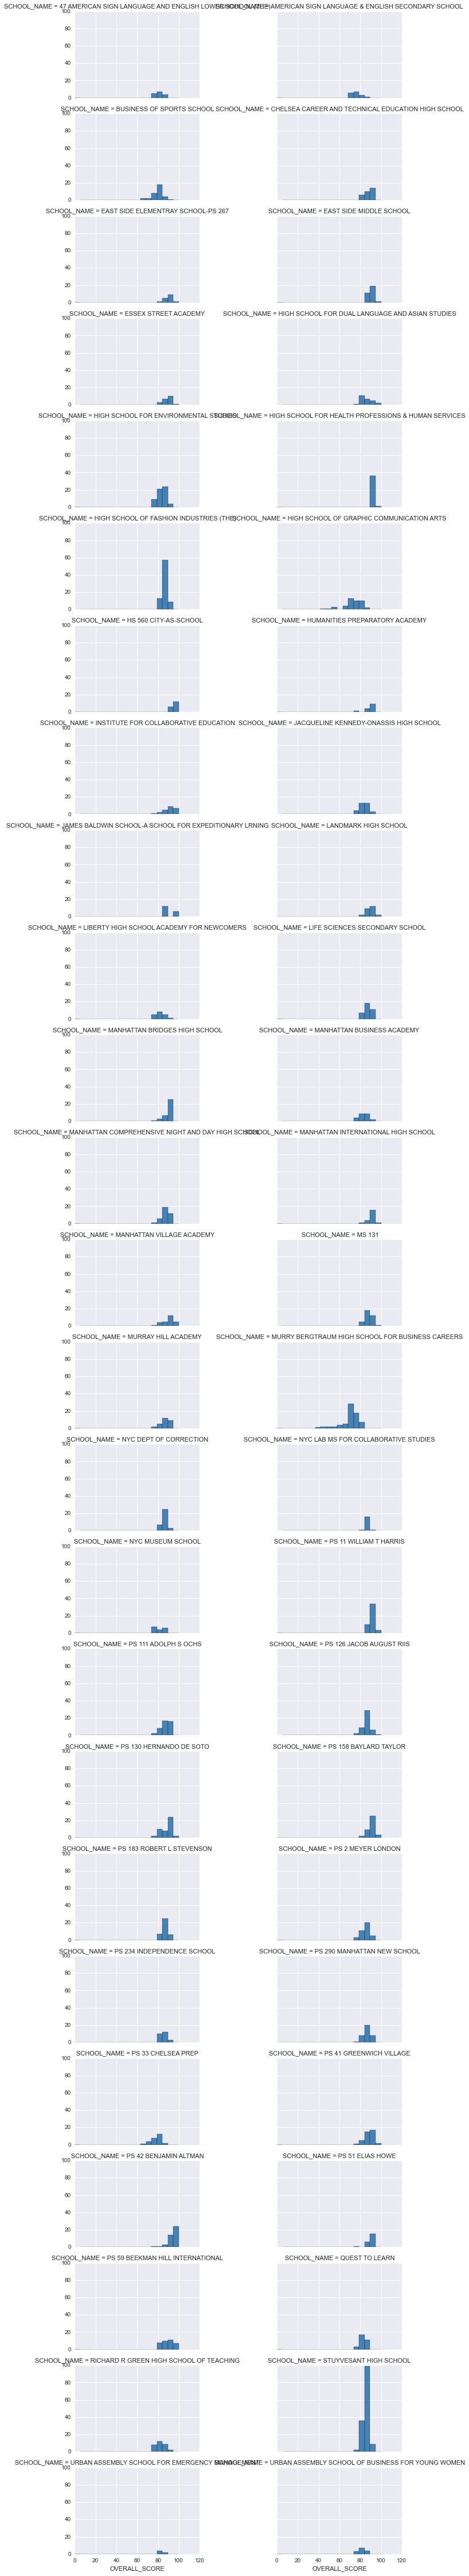

In [43]:
sns.set(style="darkgrid")
g = sns.FacetGrid(df, col='SCHOOL_NAME', col_wrap=2, size=2.5, aspect=2.)
bins = np.linspace(0, 100, 20)
g.map(plt.hist, "OVERALL_SCORE", color="steelblue", bins=bins)

## Appendix

### Data Sources

Data from http://data.nysed.gov/evaluation.php?year=2014&state=yes&report=appr  

Downloaded on 4/18/2015 in three files: 

* 3-8-2014-14.zip  
* NYSTATE_EVAL_2014.zip  
* SRC2014.zip  

These zip files contained MS Access .mdb files  

In order to import the data into python using pandas, I exported all tables with the following vba:

### Data Dictionary for SRC2014.mdb

List of tables on page 2

In [24]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('Read_Me.pdf', size=(800, 800))